In [1]:
from casq.gates import GaussianPulseGate, PulseCircuit
from casq.common import discretize, plot_signal, TimeUnit
from casq.backends import BackendCharacteristics, QiskitPulseBackend

%matplotlib inline

In [2]:
import jax

jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")
from qiskit_dynamics.array import Array

Array.set_default_backend("jax")

In [3]:
characteristics = BackendCharacteristics("ibmq_manila")
backend = characteristics.backend
pulse_backend = QiskitPulseBackend.from_backend(backend, qubits=[0])

2023-07-23 21:00:09.115 | DEBUG    | casq.common.decorators:wrapped:63 - Executed [_get_native_backend] in 390283.437 milliseconds.


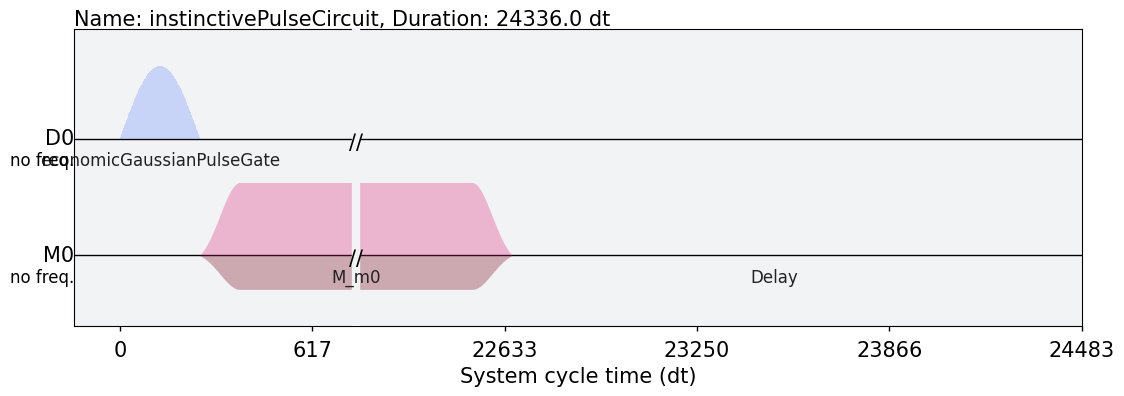

In [4]:
dt = characteristics.dt
qubit = 0
freqs = characteristics.get_channel_frequencies(["d0", "m0"])
duration = 256
amplitude = 1
sigma = 128

pulse_gate = GaussianPulseGate(duration, amplitude, sigma)
circuit = PulseCircuit.from_pulse(pulse_gate, backend, qubit)
schedule = circuit.to_schedule(backend)
schedule.draw()

In [5]:
signals = discretize(schedule, dt, {"d0": freqs["d0"], "m0": freqs["m0"]})
print(signals)

[SignalData(name='d0', dt=2.2222222222222221e-10, duration=22656, signal=<qiskit_dynamics.signals.signals.DiscreteSignal object at 0x154820f90>, i_signal=<qiskit_dynamics.signals.signals.DiscreteSignal object at 0x1549e9fd0>, q_signal=<qiskit_dynamics.signals.signals.DiscreteSignal object at 0x15332e190>, carrier=4962282808.804184), SignalData(name='m0', dt=2.2222222222222221e-10, duration=22656, signal=<qiskit_dynamics.signals.signals.DiscreteSignal object at 0x1547fadd0>, i_signal=<qiskit_dynamics.signals.signals.DiscreteSignal object at 0x154974550>, q_signal=<qiskit_dynamics.signals.signals.DiscreteSignal object at 0x154a05210>, carrier=7163170819.0)]


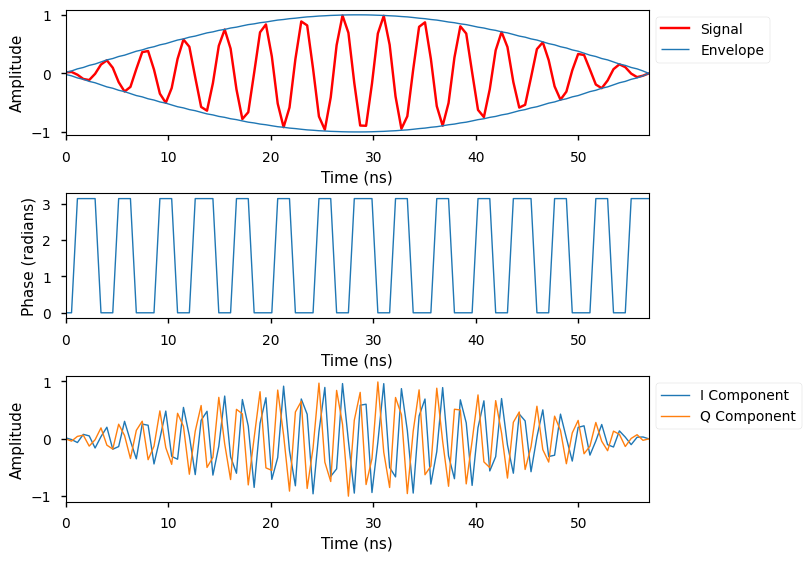

In [6]:
plot_signal(signals[0], duration=256, number_of_samples=100)

In [7]:
run_options = {"atol": 1e-6, "rtol": 1e-8, "hmax": dt}
solution = pulse_backend.run(
    circuit=circuit,
    steps=100,
    shots=1024,
    method=QiskitPulseBackend.ODESolverMethod.QISKIT_DYNAMICS_JAX_ODEINT,
    run_options=run_options,
)

2023-07-23 21:00:12.258 | DEBUG    | casq.common.decorators:wrapped:63 - Executed [run] in 1.350 seconds.


In [8]:
print(solution.iq_data[-1][-1])

(-0.568310864961621, 0.7146762642999349)


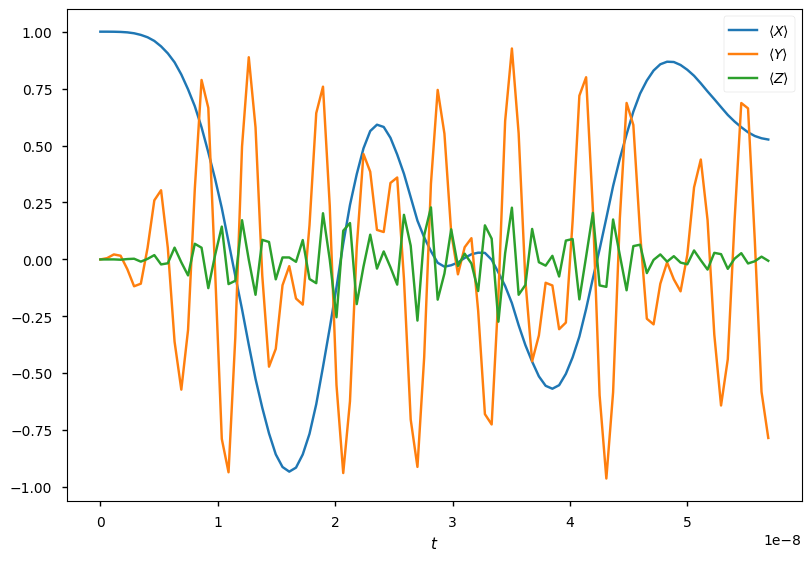

In [9]:
solution.plot_trajectory()

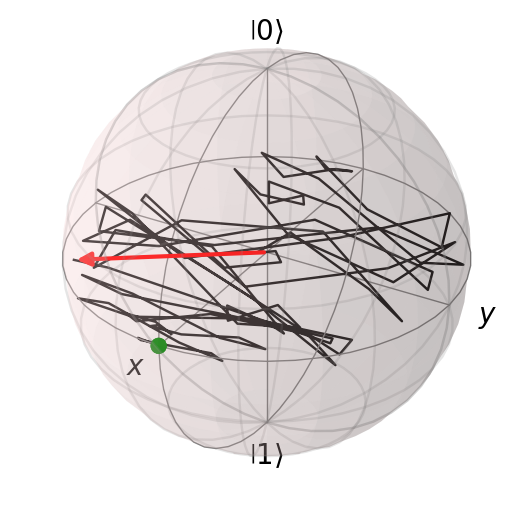

In [10]:
solution.plot_bloch_trajectory()

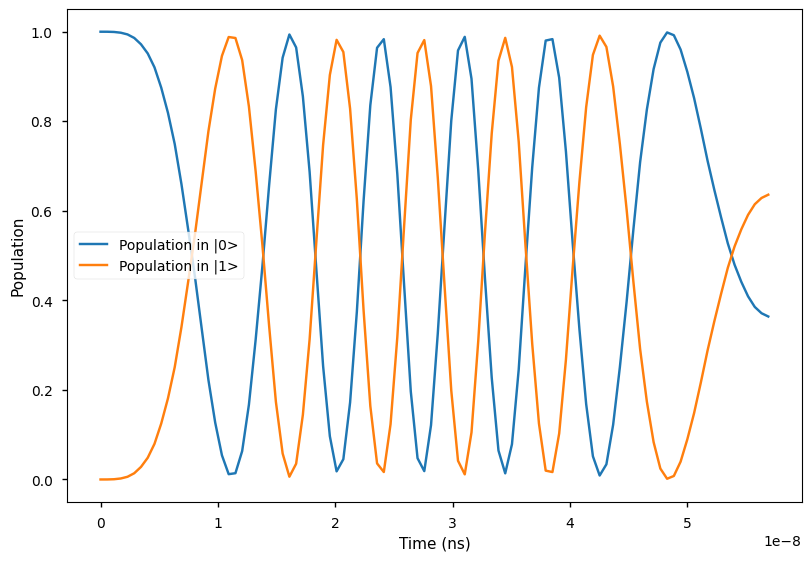

In [11]:
solution.plot_population()

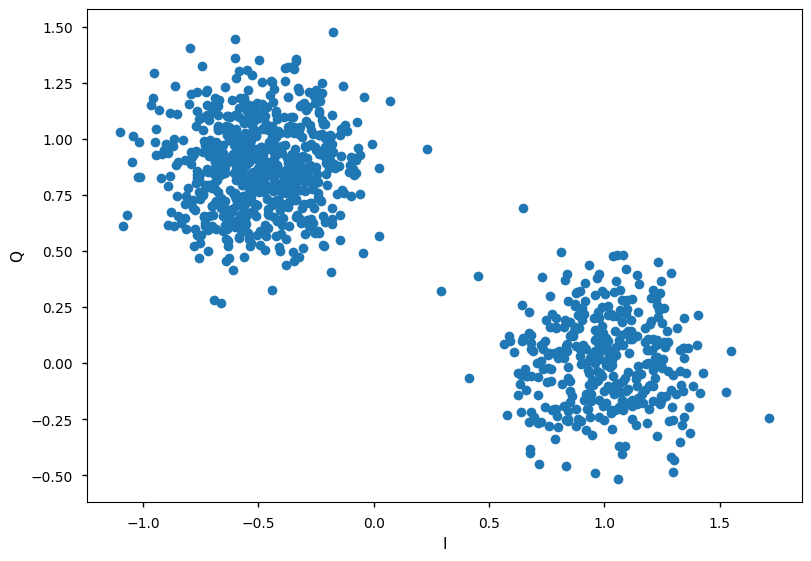

In [12]:
solution.plot_iq()

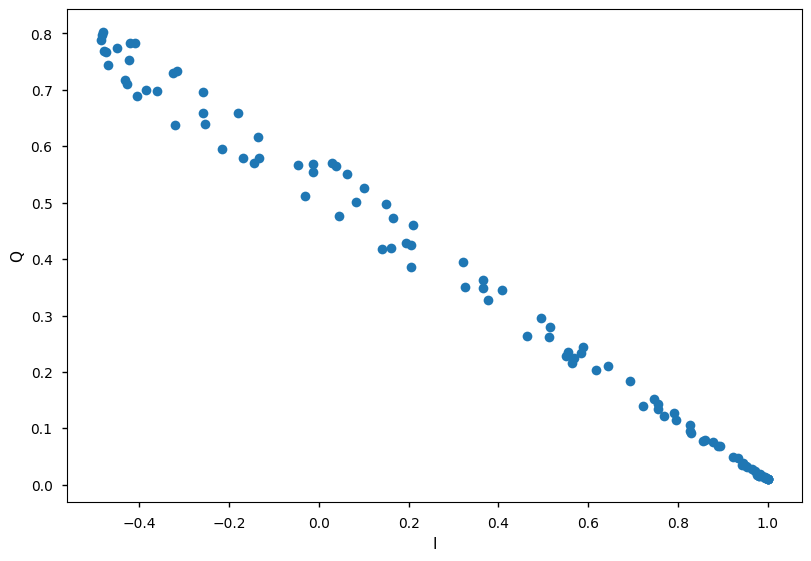

In [13]:
solution.plot_iq_trajectory()